In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
visa_df=pd.read_csv(r'C:\Users\User\Downloads\Visadataset.csv')

In [31]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [32]:
num_col=visa_df.select_dtypes(exclude='object').columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# Catrgorical to Categorical - **continent - case_status**

In [33]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [34]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many people in Asia got certified?**


**How many people in Asia got denied?**

In [35]:
con1=(visa_df['continent']=='Asia')
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])
print(f"The number of employees who have Asia certified visa are: {len(visa_df[con])} ")

The number of employees who have Asia certified visa are: 11012 


In [36]:
con1=(visa_df['continent']=='Asia')
con2=visa_df['case_status']=='Denied'
con=con1 & con2
len(visa_df[con])
print(f"The number of employees who have Asia Denied visa are: {len(visa_df[con])} ")

The number of employees who have Asia Denied visa are: 5849 


In [37]:
continents=visa_df['continent'].unique()
certified,denied=[],[]
for i in continents:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certfied_con=con1 & con2 
    denied_con=con1 & con3
    
    certified.append(len(visa_df[certfied_con]))
    denied.append(len(visa_df[denied_con]))

d={'Cerified':certified, 'Denied': denied}
df=pd.DataFrame(zip(certified,denied),index=continents,columns=['Cerified','Denied']) ## This can also be done with dictary as below
#df1=pd.DataFrame(d,index=visa_df['continent'].unique())
#print(df1)

df

,Cerified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


The above can be achieved using cross tab

**Cross tab**

- first argument:index
- second argument:columns

In [38]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)


In [39]:
col1=visa_df['continent']
col2=visa_df['case_status']

result2=pd.crosstab(col2,col1)

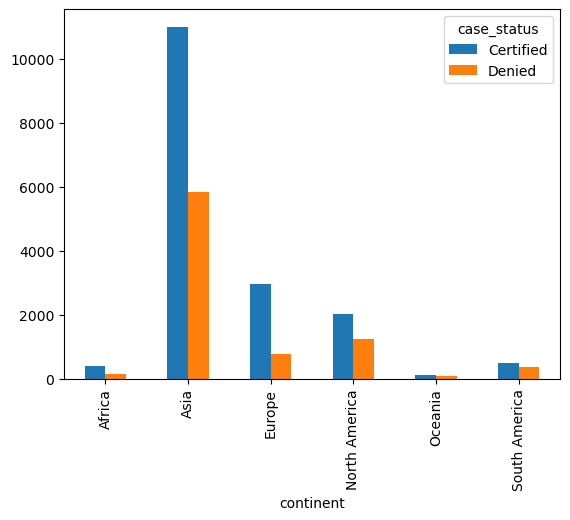

In [40]:
result1.plot(kind='bar')
plt.show()

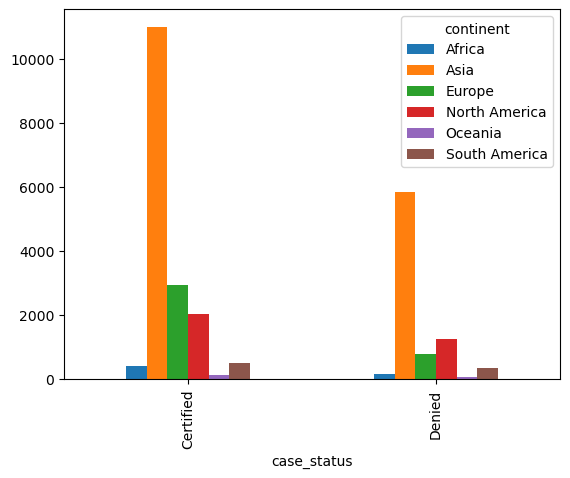

In [41]:
result2.plot(kind='bar')
plt.show()

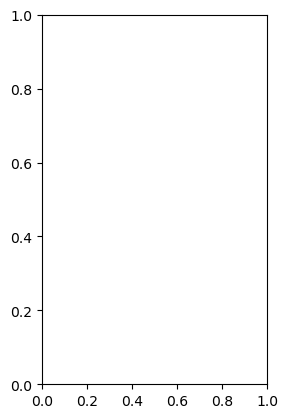

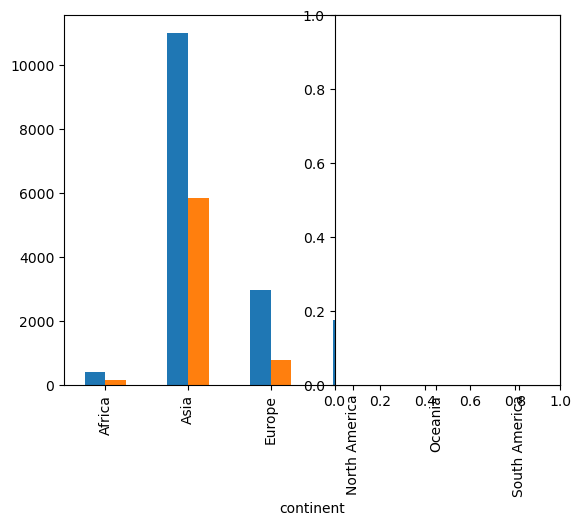

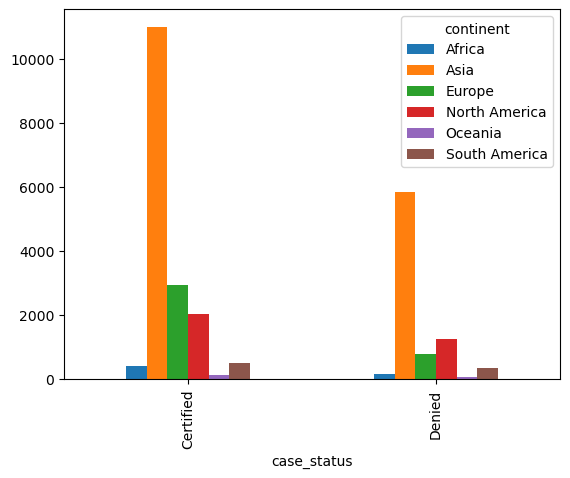

In [42]:
plt.subplot(1,2,1)
result1.plot(kind='bar')
plt.subplot(1,2,2)
result2.plot(kind='bar')
plt.show()

In [43]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col=[col1,col2]
col3=visa_df['case_status']
result3=pd.crosstab(col,col2)
result3

education_of_employee                Bachelor's  Doctorate  High School  \
continent     education_of_employee                                       
Africa        Bachelor's                    143          0            0   
              Doctorate                       0         54            0   
              High School                     0          0           66   
              Master's                        0          0            0   
Asia          Bachelor's                   7168          0            0   
              Doctorate                       0        923            0   
              High School                     0          0         2290   
              Master's                        0          0            0   
Europe        Bachelor's                   1299          0            0   
              Doctorate                       0        846            0   
              High School                     0          0          490   
              Master's                        0          0            0   
North America Bachelor's                   1225          0            0   
              Doctorate                       0        258            0   
              High School                     0          0          401   
              Master's                        0          0            0   
Oceania       Bachelor's                     66          0            0   
              Doctorate                       0         22            0   
              High School                     0          0           36   
              Master's                        0          0            0   
South America Bachelor's                    333          0            0   
              Doctorate                       0         89            0   
              High School                     0          0          137   
              Master's                        0          0            0   

education_of_employee                Master's  
continent     education_of_employee            
Africa        Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                    288  
Asia          Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                   6480  
Europe        Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                   1097  
North America Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                   1408  
Oceania       Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                     68  
South America Bachelor's                    0  
              Doctorate                     0  
              High School                   0  
              Master's                    293

**Numerical-Numerical**

- In order to plot numerical vs numerical we need to use scatter plots

- Scatter plots will give the relation between two numerical columns

- It is under matplotib

***plt.scatter***

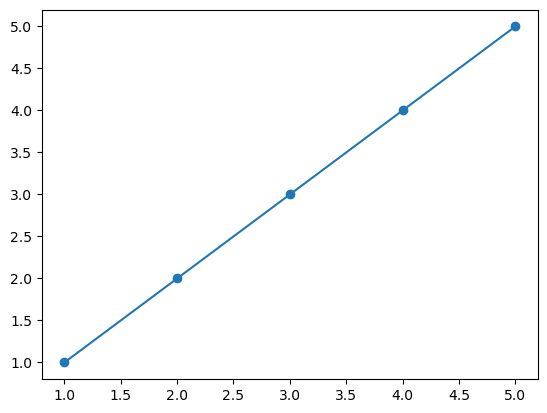

In [44]:
#y=x graph

x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

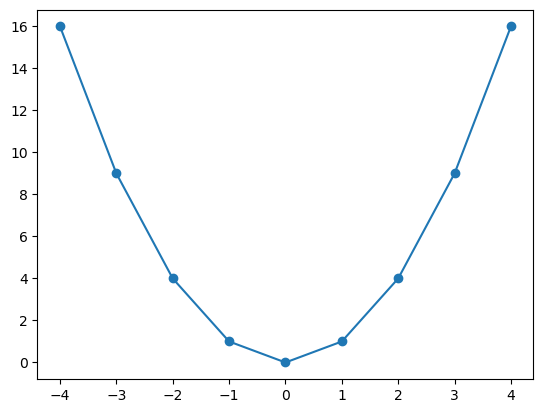

In [45]:
#y=x*x graph

x=[i for i in range(-4,5)]
y=[i*i for i in x]

plt.scatter(x,y)
plt.plot(x,y)

In [46]:
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Scatter plot-1**

-no_of_employees and yr_of_estab

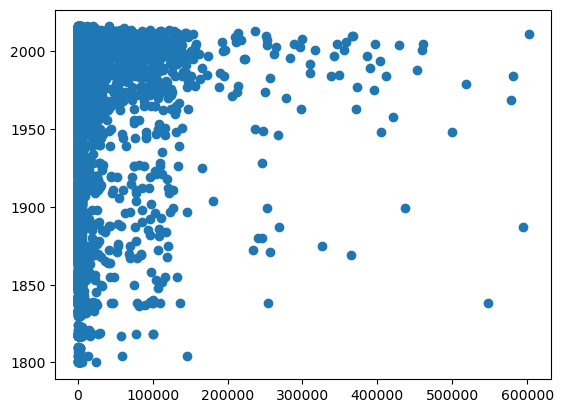

In [47]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']

plt.scatter(col1,col2)

**Observation is no relation in the above plot**

**Scatter plot -2**

no_of_employees and prevailing_wage

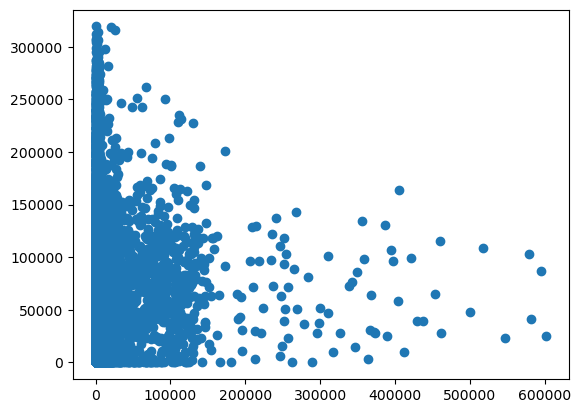

In [48]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']

plt.scatter(col1,col2)

**Scatter plot -3**

prevailing_wage and yr_of_estab

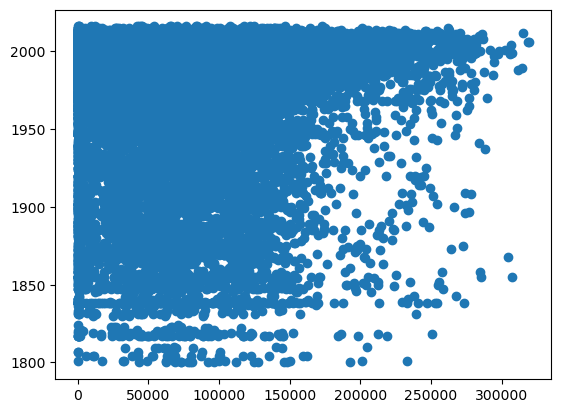

In [49]:
col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']

plt.scatter(col1,col2)

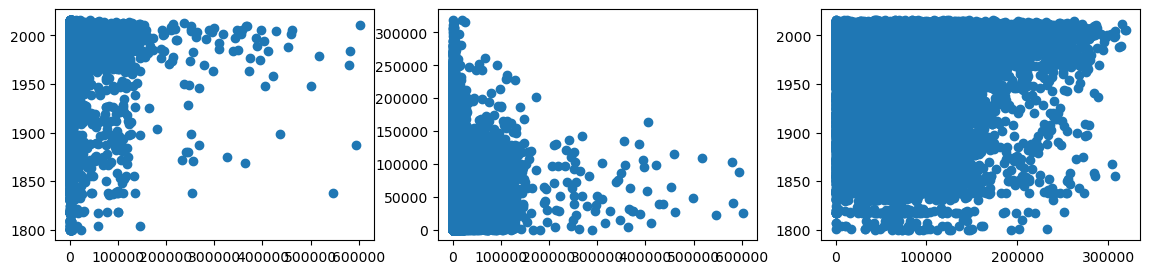

In [50]:
plt.figure(figsize=(14,3))
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']

plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,3).scatter(col1,col2)


## **Pearson correlation coefficient**

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="23" data-atf="0">

- Pearson correlation coefficient will give the amount of relation between variables

- It is denoted with r

- r varies from -1 to 1
    - for postive relation r varies from 0 to 1
    - for negative relation r varies from -1 to 0
    - for no relation r is approximate 0

- In Python we have **corr** function under pandas
        - This will give co-variance matrix
        - In this data we have 3 numerical columns
        - so we will get 3*3*3 matrix which will have 9 elements
        - All the trace elements will represent variance
        - Upper and lower traingle elements will reprent co-variance
        

In [51]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**
  
- The correlation value between no_of_employees  and yr_of_estab is approximately 0
    - which indicates no relation
- The correlation value between no_of_employees  and prevailing_wage is approximately 0
    - which indicates no relation
- The correlation value between prevailing_wage  and yr_of_estab is approximately 0
    - which indicates no relation

**What happens if correlation is high**

- for that we will read wine quality dataset
- will perform the corr

In [52]:
wine_df=pd.read_csv(r'C:\Users\User\Downloads\winequality_red.csv')
wine_data=wine_df.drop_duplicates()
wine_data=wine_data.iloc[1:,:] #indexes are not in order. Make them in order: homwwork
wine_data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [53]:
len(wine_data.columns)

12

In [54]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heat map**

    -  heat map will provide the matrix representation of correlation value
    - heat map represents values in color format
    - different value in different color
    - beside matrix it will display color bar
    - it is under seaborn package

<Axes: >

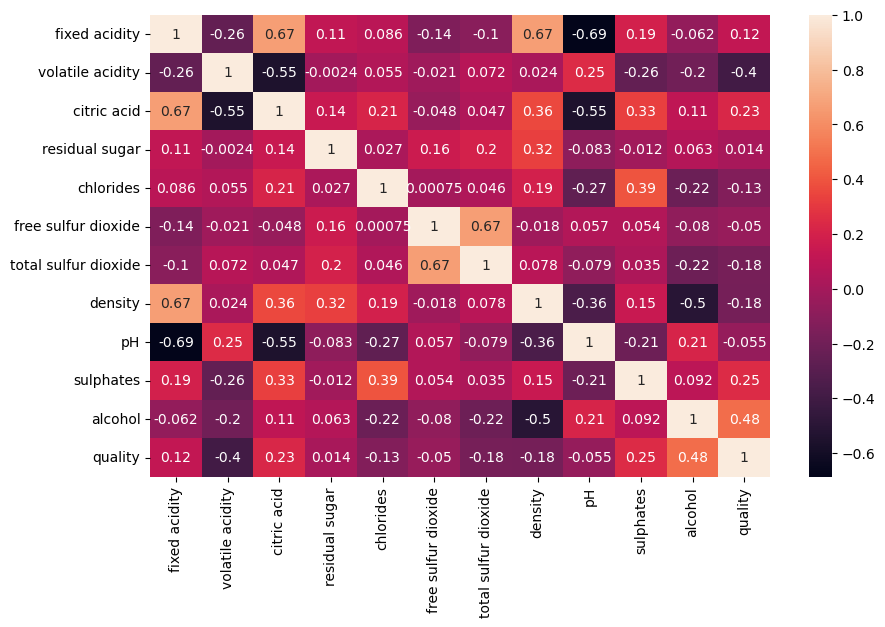

In [57]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True)

<Axes: >

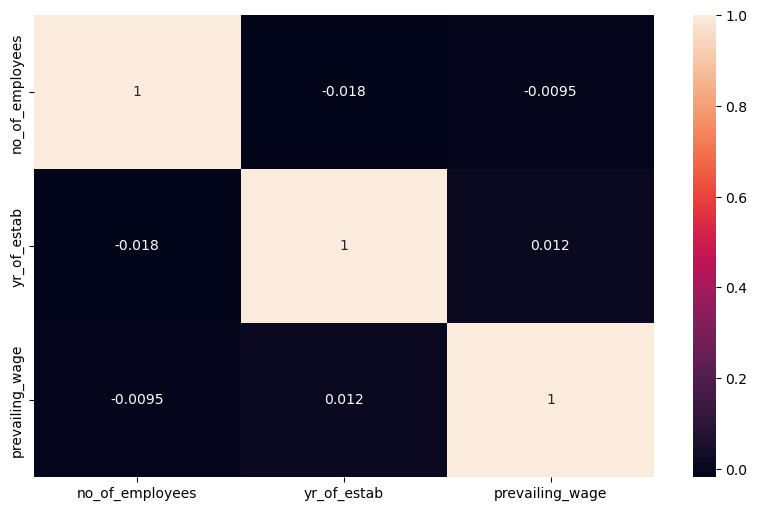

In [59]:
visa_corr=visa_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(visa_corr,annot=True)


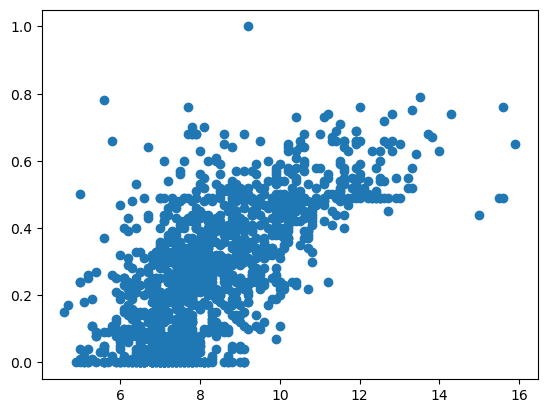

In [60]:
#Draw the scatter plot for wine data columns
#which is having highest positive correlation
#which is having lowest positive correlation

#for positive correlation
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.scatter(col1,col2)